In [116]:
import pandas as pd
import numpy as np
data = pd.read_csv('Churn_Modelling.csv')

In [117]:
X = data.iloc[:,3:13]
y  = data.iloc[:,13]

In [118]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [119]:
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [120]:
X.shape

(10000, 11)

In [121]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [122]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [123]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
import tensorflow
print(tensorflow.__version__)

2.13.1


In [126]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
from keras.callbacks import History

# Define the callback
histories = History()

In [127]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation=''))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [128]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                120       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100,callbacks = [histories])

Epoch 1/100
54/54 [==============================] - 1s 4ms/step - loss: 0.5993 - accuracy: 0.7962 - val_loss: 0.5853 - val_accuracy: 0.7955
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7962 - val_loss: 0.5633 - val_accuracy: 0.7955
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7962 - val_loss: 0.5465 - val_accuracy: 0.7955
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7962 - val_loss: 0.5335 - val_accuracy: 0.7955
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7962 - val_loss: 0.5240 - val_accuracy: 0.7955
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7962 - val_loss: 0.5166 - val_accuracy: 0.7955
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7962 - val_loss: 0.5107 - val_accuracy: 0.7955
Epoch 8/100
5

In [130]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [131]:
import matplotlib.pyplot as plt 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


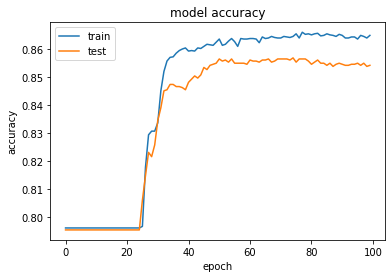

In [132]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

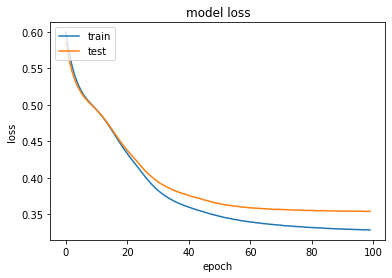

In [133]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [167]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [168]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [169]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [170]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [171]:
score

0.8585